In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

news_df = pd.read_csv("./보배드림 뉴스 크롤링.csv")
news_df = news_df.drop(['내용'], axis=1)
news_df.head()

,제목,날짜,추천수,조회수
0,"법원 ""교통사고 가해측 보험사는 피해차 가치 하락도 배상해야""",05/03,5.0,692.0
1,"에디슨EV ""채권자가 법원에 파산 신청…채권액 36억원""",05/06,3.0,1266.0
2,"기아, 신형 니로 EV 사전계약 실시…1회 충전에 401㎞ 주..",05/03,2.0,1452.0
3,"현대차, 3년 만에 유관중으로 `현대 N 페스티벌` 개최",05/03,1.0,260.0
4,호세 무뇨스 현대차 사장 이사회 합류…글로벌시장 챙긴다,05/04,1.0,274.0


In [ ]:
pip install soynlp
PyKoSpacing

In [2]:
from eunjeon import Mecab

tagger=Mecab()
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

def tagging_text(texts):
    corpus = []
    for text in texts:
        text = tagger.pos(text)
        for i in range(len(text)-1):
            if text[i][1] in significant_tags:
                corpus.append(f"{text[i][0]}/{text[i][1]}")
    return corpus

In [3]:
tagger.pos("교통사고 가해측")

NameError: name 'tagger' is not defined

In [4]:
tagged_corpus = tagging_text(news_df.제목)

for i in range(5):
    print(tagged_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [5]:
import re

p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

In [6]:
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [7]:
stem_corpus = stemming_text(tagged_corpus)

for i in range(0, 5):
    print(stem_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [8]:
stopwords = ['이/VCP','있/VA','하/VV','씨/NNB','것/NNB','들/XSN','그/MM','되/VV','수/NNB','이/NP','속/NNG',
'보/VX','않/VX','집/NNG','없/VA','살/VV','나/NP','적/XSN','주/VV','월/NNB','데/NNB','등/NNB','같/VA','안/MAG',
'우리/NP','어떤/MM','때/NNG','내/NP','년/NNB','내/VV','가/VV''한/MM','명/NNB','지/VX','오/VV','말/NNG','일/NNG',
'앞/NNG','번/NNB','나/VX','두/VV','알/VV','개/NNB','받/VV','전/NNG','들/VV','일/NNB','또/MAG','점/NNG','싶/VX',
'더/MAG','말/VX','많/VA','좀/MAG','원/NNB','좋/VA','잘/MAG','크/VA','중/NNB','놓/VX']

In [9]:
def remove_stopword_text(text):
    corpus = []
    for sent in text:
        modi_sent = []
        for word in sent.split(' '):
            if word not in stopwords:
                modi_sent.append(word)
        corpus.append(' '.join(modi_sent))
    return corpus

In [10]:
removed_stopword_corpus = remove_stopword_text(stem_corpus)

for i in range(5):
    print(removed_stopword_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [11]:
comm_df = pd.read_excel("./대화_데이터셋.xlsx")
comm_df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [17]:
comm_df.isna().sum()

Sentence    0
Emotion     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(comm_df, test_size=0.15, random_state=3)
print(len(train))
print(len(test))

23686
4180


   Emotion  count
0        0  18540
1        1   5146


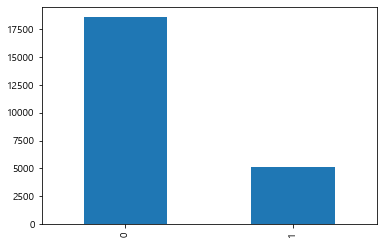

In [13]:
train['Emotion'].value_counts().plot(kind = 'bar')
print(train.groupby('Emotion').size().reset_index(name = 'count'))

In [14]:
import numpy as np

train['Sentence'] = train['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['Sentence'] = test['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['Sentence'] = train['Sentence'].str.replace('^ +', "")
test['Sentence'] = test['Sentence'].str.replace('^ +', "")
train['Sentence'].replace('', np.nan, inplace = True)
test['Sentence'].replace('', np.nan, inplace = True)

print(len(train))
print(len(test))

In [20]:
from konlpy.tag import Okt

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
okt = Okt()
t_train = [] 
t_test = []

for sentence in train['Sentence']:
    temp_X = okt.morphs(str(sentence), stem = True) 
    temp_X = [word for word in temp_X if not word in stopwords]
    t_train.append(temp_X)
    
for sentence in test['Sentence']:
    temp_X = okt.morphs(str(sentence), stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    t_test.append(temp_X)

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(t_train)
tokenizer.fit_on_texts(t_test)

In [22]:
import pickle
 
with open("comm_data.pickle","wb") as fw:
    pickle.dump(tokenizer, fw)

In [23]:
t_train1 = tokenizer.texts_to_sequences(t_train)
t_test1 = tokenizer.texts_to_sequences(t_test)

In [24]:
e_train = train['Emotion']
e_test = test['Emotion']

In [35]:
vocab_size = len(tokenizer.word_index)
max_len = max(len(l) for l in t_train1)
print(vocab_size)
print(max_len)

18942
112


In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

t_train2 = pad_sequences(t_train1, maxlen = max_len)
t_test2 = pad_sequences(t_test1, maxlen = max_len)

In [36]:
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.5))
model.add(GRU(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

es = EarlyStopping(monitor='LDGD', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('SC.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(t_train2, e_train, epochs=15, callbacks=[es, mc], batch_size=6000, validation_split=0.2)

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [2]:
import numpy as np
import tensorflow as tf
1.19.5
print(np.__version__)
print(tf.__version__)

1.21.5
2.5.3


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('LDGD.h5')
print(loaded_model.evaluate(t_test2, e_test)[1])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

e_train_pred = cross_val_predict(loaded_model, t_train2, e_train, cv=3)
cf = confusion_matrix(e_train, e_train_pred)
print(cf)